In [96]:
import json, os, re

In [139]:
data_list = list()
for count, file in enumerate(os.listdir("reviews")):
    if not file.startswith("."):
        with open("reviews/" + file, "rb") as handle:
            data = handle.read()
            data_str = data.decode("utf-8", errors='ignore')
            data_list.append({**json.loads(data_str), "id" : re.search(r".*_(\d*).json$", file).groups(1)[0]})
    else:
        print("at index {}: file {} not included".format(count, file))


at index 158: file .DS_Store not included


In [140]:
review_id_matrix = [[a["review_id"] for a in b["reviews"]] for b in data_list if "reviews" in b.keys()]

In [141]:
review_ids = [item for sublist in review_id_matrix for item in sublist]

In [142]:
usr_location_matrix = [[a["user_location"] for a in b["reviews"] if "user_location" in a.keys()] for b in data_list if "reviews" in b.keys()]

In [143]:
usr_locations = [item for sublist in usr_location_matrix for item in sublist]

In [144]:
unique_locations = set([a.lower() for a in usr_locations])

In [157]:
len(unique_locations)

10798

In [146]:
len(review_ids)

106010

In [147]:
import pandas as pd
import geopandas as gpd
import contextily as ct

In [148]:
def without_keys(d, keys):
    return {x: d[x] for x in d if x not in keys}

In [149]:
overview = [{**without_keys(a, ["coordinates", "num_reviews", "url", "reviews"]), "lat": a["coordinates"][0], "lon": a["coordinates"][1], "total_reviews" : sum([list(b.values())[0] for b in a["num_reviews"]])} for a in data_list if "coordinates" in a.keys()]

In [150]:
overview_df = pd.DataFrame.from_records(overview)

In [151]:
sum([list(b.values())[0] for b in data_list[0]["num_reviews"]])

31

In [152]:
overview_gdf = gpd.GeoDataFrame(
    overview_df, geometry=gpd.points_from_xy(overview_df.lon, overview_df.lat))

In [153]:
overview_gdf = overview_gdf.set_crs(crs="EPSG:4326")

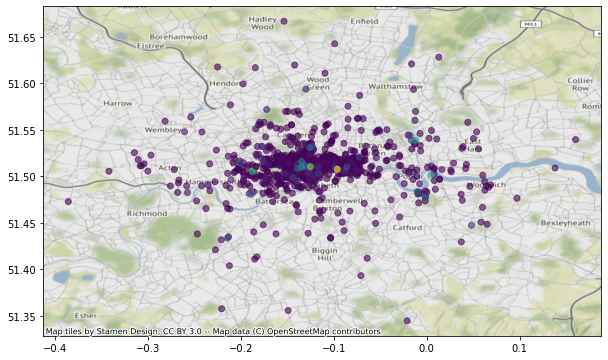

In [154]:
ax = overview_gdf.sort_values("total_reviews", ascending=True).plot(column="total_reviews" ,figsize=(10,10), alpha=0.6)
ct.add_basemap(ax=ax, crs=overview_gdf.crs.to_string())

In [155]:
overview_gdf.sort_values("total_reviews", ascending=False)

,name,id,lat,lon,total_reviews,geometry
583,Shakespeare's Globe Theatre,50,51.507542,-0.096249,7653,POINT (-0.09625 51.50754)
501,Trafalgar Square,65,51.510418,-0.125205,6166,POINT (-0.12521 51.51042)
813,Kensington Palace,168,51.504990,-0.187683,4863,POINT (-0.18768 51.50499)
962,The O2,221,51.501999,0.004814,4701,POINT (0.00481 51.50200)
425,Piccadilly Circus,116,51.509979,-0.134428,4050,POINT (-0.13443 51.50998)
...,...,...,...,...,...,...
880,Virginia Settlers' Monument,1113,51.509701,0.000950,0,POINT (0.00095 51.50970)
196,TriSpace Gallery,1126,51.494820,-0.061208,0,POINT (-0.06121 51.49482)
915,Casa de San Martin,1104,51.525318,-0.160260,0,POINT (-0.16026 51.52532)
830,New West End Synagogue,1109,51.519089,-0.148360,0,POINT (-0.14836 51.51909)


In [59]:
import esda